In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [42]:
subs = """title = re.sub(re.escape('[O][O] + 2 [Pt] <=> 2 O=[Pt]'), 'R1', title)
title = re.sub(re.escape('[H][H] + 2 [Pt] <=> 2 [Pt]'), 'R2', title)
title = re.sub(re.escape('[Pt] + O=[Pt] <=> O[Pt] + [Pt]'), 'R3', title)
title = re.sub(re.escape('C + 2 [Pt] <=> C[Pt] + [Pt]'), 'R4', title)
title = re.sub(re.escape('C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]'), 'R5', title)
title = re.sub(re.escape('C=[Pt] + [Pt] <=> C[Pt] + [Pt]'), 'R6', title)
title = re.sub(re.escape('C#[Pt] + [Pt] <=> C=[Pt] + [Pt]'), 'R7', title)
title = re.sub(re.escape('C#[Pt] + [Pt] <=> C~[Pt] + [Pt]'), 'R8', title)
title = re.sub(re.escape('C~[Pt] + [H][H] <=> C=[Pt]'), 'R9', title)
title = re.sub(re.escape('[C-]#[O+] + [Pt] <=> O=C=[Pt]'), 'R10', title)
title = re.sub(re.escape('C~[Pt] + O=[Pt] <=> O=C=[Pt] + [Pt]'), 'R11', title)
title = re.sub(re.escape('C + O[Pt] + [Pt] <=> C[Pt] + O.[Pt]'), 'R12', title)
title = re.sub(re.escape('O + [Pt] <=> O.[Pt]'), 'R13', title)
title = re.sub(re.escape('O.[Pt] + O=[Pt] <=> 2 O[Pt]'), 'R14', title)
title = re.sub(re.escape('O[Pt] + [Pt] <=> O.[Pt] + [Pt]'), 'R15', title)
title = re.sub(re.escape('[Pt] + O[Pt] <=> O.[Pt] + [Pt]'), 'R15', title)
title = re.sub(re.escape('O=C=O + [Pt] <=> O=C=O.[Pt]'), 'R16', title)
title = re.sub(re.escape('O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]'), 'R17', title)
title = re.sub(re.escape('O=C=O.[Pt] + [Pt] <=> O[Pt] + O=C=[Pt]'), 'R18', title)
title = re.sub(re.escape('O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]'), 'R18', title)
title = re.sub(re.escape('C + [Pt] <=> C.[Pt]'), 'R19', title)
title = re.sub(re.escape('[H][H] + [Pt] <=> [H][H].[Pt]'), 'R20', title)
title = re.sub(re.escape('[H] + [Pt] <=> [Pt]'), 'R21', title)
title = re.sub(re.escape('[OH] + [Pt] <=> O[Pt]'), 'R22', title)
title = re.sub(re.escape('[CH3] + [Pt] <=> C[Pt]'), 'R23', title)
title = re.sub(re.escape('[CH]=O + [Pt] <=> O=C[Pt]'), 'R24', title)
title = re.sub(re.escape('O + 2 [Pt] <=> O[Pt] + [Pt]'), 'R25', title)
title = re.sub(re.escape('O + 2 [Pt] <=> [Pt] + O[Pt]'), 'R25', title)
title = re.sub(re.escape('CC + 2 [Pt] <=> 2 C[Pt]'), 'R26', title)
title = re.sub(re.escape('CO + 2 [Pt] <=> C[Pt] + O[Pt]'), 'R27', title)
title = re.sub(re.escape('C=O + 2 [Pt] <=> O=C[Pt] + [Pt]'), 'R28', title)
title = re.sub(re.escape('CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]'), 'R29', title)
title = re.sub(re.escape('C=[Pt] + O[Pt] <=> C[Pt] + O=[Pt]'), 'R30', title)
title = re.sub(re.escape('C#[Pt] + O[Pt] <=> C=[Pt] + O=[Pt]'), 'R31', title)
title = re.sub(re.escape('2 C=[Pt] <=> C[Pt] + C#[Pt]'), 'R32', title)
title = re.sub(re.escape('C~[Pt] + O[Pt] <=> C#[Pt] + O=[Pt]'), 'R33', title)
title = re.sub(re.escape('C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]'), 'R34', title)
title = re.sub(re.escape('C=[Pt] + C~[Pt] <=> 2 C#[Pt]'), 'R35', title)
title = re.sub(re.escape('O=C[Pt] + O=[Pt] <=> O[Pt] + O=C=[Pt]'), 'R36', title)
title = re.sub(re.escape('O=C[Pt] + O=[Pt] <=> O=C=[Pt] + O[Pt]'), 'R36', title)
title = re.sub(re.escape('C=[Pt] + O=C[Pt] <=> C[Pt] + O=C=[Pt]'), 'R37', title)
title = re.sub(re.escape('O=C[Pt] + C#[Pt] <=> C=[Pt] + O=C=[Pt]'), 'R38', title)
title = re.sub(re.escape('O=C[Pt] + C~[Pt] <=> C#[Pt] + O=C=[Pt]'), 'R39', title)
title = re.sub(re.escape('O=C[Pt] + [Pt] <=> [Pt] + O=C=[Pt]'), 'R40', title)
title = re.sub(re.escape('O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]'), 'R40', title)
title = re.sub(re.escape('[C-]#[O+] + [Pt] <=> [C-]#[O+].[Pt]'), 'R', title)
title = re.sub(re.escape('[CH]C + 2 [Pt] <=> C[Pt] + C#[Pt]'), 'R?', title)"""
translation = {}
for l in subs.split("\n"):
    reaction, label = l.lstrip("""title = re.sub(re.escape('""").strip(""", title)""").split("'), ")
    label = label.strip("'").lstrip("'")
    translation[reaction] = label

In [43]:
def import_sensitivities(ratio):
    """
    Ratio is the C/O starting gas ratio
    file_location is the LSR C and O binding energy, fasle to load the base case
    thermo is either False to load reaction sensitivities or True to load thermo sensitivities
    """
    data = pd.read_csv('./avg-sensitivities/' + str(ratio) + 'avgRxnSensitivity.csv')
    data = data.values
    data = data.tolist()
    return data

In [44]:
ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
sens_types = ['SynGas Selectivity', 'SynGas Yield', 'CO Selectivity', 'CO Yield',
              'H2 Selectivity', 'H2 Yield', 'CH4 Conversion', 'CO2+H2O Selectivity',
              'CO2+H2O Yield', 'Exit Temperature', 'Maximum Temperature',
              'Dist to Max Temperature', 'O2 Conversion', 'Max CH4 Conv', 'Dist to 50 CH4 Conv']
sens_dict = {}
for s in range(len(sens_types)):
    sens_dict[sens_types[s]] = s

sens_index = list(range(len(sens_types)))
ratios_index = list(range(len(ratios)))
sens_index_dict = dict(zip(sens_types, sens_index))
rev_sens_index_dict = dict(zip(sens_index, sens_types))
ratios_index_dict = dict(zip(ratios, ratios_index))
rev_ratios_index_dict = dict(zip(ratios_index, ratios))

In [45]:
sens_data = []
for r in ratios:
    sens_data.append(import_sensitivities(r))
sens_data

[[[0,
   '[H][H] + 2 [Pt] <=> 2 [Pt]',
   -0.0002571098197820628,
   -0.0002572443810184142,
   -9.359884057373367e-05,
   -9.373357164851748e-05,
   -8.882039456407233e-05,
   -7.589881713050497e-05,
   -1.3523153208046606e-07,
   0.00021722723697038728,
   0.00023014826087930363,
   0.0001594101218271395,
   8.861002835842415e-06,
   0.0,
   -4.1403244747883155e-11,
   -0.009626983540686005,
   0.0],
  [1,
   'O=C=O + [Pt] <=> O=C=O.[Pt]',
   -0.00015141518844490122,
   -0.00015365775147968522,
   -7.567509325314309e-05,
   -7.791759903541935e-05,
   -0.00032281372481851145,
   -0.000335172615940961,
   -1.0814274743537078e-05,
   0.00046568510807129364,
   0.0002328620805588751,
   5.469674637223831e-05,
   -5.349048722901026e-05,
   -0.014694339373125694,
   -1.5398793446390326e-11,
   0.023345216413738577,
   -0.01477539541884231],
  [2,
   '[C-]#[O+] + [Pt] <=> O=C=[Pt]',
   1.1109621143071914e-05,
   1.2125261258925704e-05,
   8.626378948500958e-06,
   9.642019042764407e-06,
   

In [46]:
reactions = set()  # create list of unique reactions
for r in range(len(sens_data[0])):  # for each reaction
    reactions.add(sens_data[0][r][1])  # append the reaction itself
reactions = list(sens_data)

In [47]:
def calculate(data):
    ratio = data[1]
    ch4_in = data[2]
    ch4_out = data[3]
    co_out = data[4]
    h2_out = data[5]
    h2o_out = data[6]
    co2_out = data[7]
    exit_T = data[8]
    max_T = data[9]
    dist_Tmax = data[10]
    o2_conv = data[11]
    max_ch4_conv = data[12]  # max rate of change
    dist_to_50_ch4_conv = data[13]

    ch4_depletion = ch4_in - ch4_out
    ch4_conv = ch4_depletion / ch4_in
    h2_sel = h2_out / (ch4_depletion * 2)
    h2_yield = h2_out / ( ch4_in * 2)
    co_sel = co_out / ch4_depletion
    co_yield = co_out / ch4_in
    syngas_sel = co_sel + h2_sel
    syngas_yield = syngas_sel * ch4_conv
    co2_sel = co2_out / ch4_depletion
    h2o_sel = h2o_out / (2 * ch4_depletion)
    fullox_sel = h2o_sel + co2_sel
    fullox_yield = fullox_sel * ch4_conv

    return syngas_sel, syngas_yield, co_sel, co_yield, h2_sel, h2_yield, ch4_conv, fullox_sel, fullox_yield, exit_T, max_T, dist_Tmax, o2_conv, max_ch4_conv, dist_to_50_ch4_conv


def get_sens_data(sens_data, s):
    ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
    data = []
    for ratio in range(len(ratios)):
        tmp = []
        for rxn in range(len(sens_data[0])):
            try:
                tmp.append([translation[sens_data[ratio][rxn][1]], abs(sens_data[ratio][rxn][s+2])])
            except:
                tmp.append([sens_data[ratio][rxn][1], abs(sens_data[ratio][rxn][s+2])])
        tmp = sorted(tmp, key=lambda l:l[1], reverse=True)
#         tmp = sorted(tmp, key=itemgetter(1))
#         print(ratios[ratio])
#         for x in range(5):
#             print(tmp[x])
    return tmp


def import_data(ratio):
    data = pd.read_csv('./avgdata.csv')
    data = data.values
    
    for x in range(len(data)):
        r = round(data[x][1],1)
        if r == ratio:
            return calculate(data[x])

In [48]:
get_sens_data(sens_data, 1)

[['R5', 0.2744697285075289],
 ['R18', 0.10743194794405864],
 ['R19', 0.06334919520080337],
 ['R27', 0.05827051285139045],
 ['R23', 0.037373553126505914],
 ['R26', 0.03278691729031487],
 ['R4', 0.01724956455521548],
 ['R33', 0.016516268130939912],
 ['R16', 0.013048997947364327],
 ['R37', 0.012514658116959705],
 ['R12', 0.010536694690542456],
 ['R35', 0.008558530698859508],
 ['R38', 0.00837044957184966],
 ['R34', 0.0069611145254792105],
 ['R11', 0.006461155435954483],
 ['R7', 0.006455734336336308],
 ['R9', 0.0055680614484283604],
 ['R25', 0.005545678710460012],
 ['R21', 0.004786190865933506],
 ['R2', 0.0043228182677024435],
 ['R32', 0.002869331028722618],
 ['R40', 0.0027323702512327282],
 ['R', 0.002431625933957995],
 ['R13', 0.002311889258080147],
 ['R28', 0.0022932896262258147],
 ['R24', 0.002290450804837255],
 ['R30', 0.002075274237528527],
 ['R14', 0.002041546380922941],
 ['R1', 0.001811091410919127],
 ['R3', 0.0014091969148372287],
 ['R15', 0.0012488651171402186],
 ['R29', 0.0005014

In [49]:
ratios = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
data = []

sens = 1
for rxn in range(len(sens_data[0])):
    tmp = 0.
    for ratio in range(len(ratios)):
        tmp += abs(sens_data[ratio][rxn][sens_dict['SynGas Yield'] + 2])
    try:
        data.append([translation[sens_data[ratio][rxn][1]], tmp])
    except:
        data.append([sens_data[ratio][rxn][1], tmp])
        


In [50]:
data = sorted(data, key=lambda l:l[1], reverse=True)

In [51]:
data

[['R20', 3.1567152939109566],
 ['R5', 1.8759106122030205],
 ['R1', 0.3128096854110778],
 ['R9', 0.24573539645081535],
 ['R?', 0.23531060304841014],
 ['R27', 0.22589785549787084],
 ['R18', 0.20731641194652078],
 ['R23', 0.18686176013674938],
 ['R33', 0.1640115105565697],
 ['R19', 0.14638837609880995],
 ['R25', 0.142618609149577],
 ['R4', 0.13404471120114606],
 ['R21', 0.1311443359817498],
 ['R7', 0.12452741156755157],
 ['R35', 0.12350895096416639],
 ['R29', 0.11992449325021685],
 ['R8', 0.11860240988993222],
 ['R38', 0.11430143123617395],
 ['R6', 0.11307119852706965],
 ['R3', 0.1126758923644469],
 ['R11', 0.11121050287824441],
 ['R30', 0.10731742716070763],
 ['R2', 0.10471974420693334],
 ['R22', 0.10118579030881737],
 ['R16', 0.09927087284599487],
 ['R37', 0.09741511844880531],
 ['R39', 0.08694286451394119],
 ['R40', 0.0863838873009076],
 ['R14', 0.08007189171297108],
 ['R32', 0.07902577198346561],
 ['R26', 0.07781826002799178],
 ['R34', 0.07163101775338361],
 ['R15', 0.0710240389364947

In [52]:
test = import_sensitivities(1.0)
test

[[0,
  '[H][H] + 2 [Pt] <=> 2 [Pt]',
  0.000601031525220549,
  0.009788918675805931,
  8.715787472151982e-06,
  0.00919646209367715,
  0.0047428416963484045,
  0.010425733852979496,
  0.0091883019155956,
  0.0009845918147879343,
  -0.014684660502194231,
  -0.0058469292901795755,
  0.0005880437377005081,
  -0.027421915927562556,
  -2.775557561562918e-15,
  -0.04048779819703941,
  0.0],
 [1,
  'O=C=O + [Pt] <=> O=C=O.[Pt]',
  0.001049540676433894,
  0.007680306294623232,
  0.0007790890327607907,
  0.004130025820122063,
  0.0017735600569367981,
  0.005530487312437,
  0.0037425823676343717,
  -0.008171815157800449,
  -0.0068736854341923115,
  -0.002485789522119699,
  0.0006312053952590469,
  0.0,
  0.0,
  -0.0034923091665943467,
  0.0],
 [2,
  '[C-]#[O+] + [Pt] <=> O=C=[Pt]',
  0.0003818887404045031,
  0.001211322083573304,
  0.00014138352823061046,
  0.0006963993235754237,
  0.0015478659726719927,
  0.0017642741288432285,
  0.0014293487290171832,
  -0.006395916315319955,
  -0.002303223097

In [53]:
test0 = import_data(1.0)
test0

(1.775000919029091,
 1.3118371849444246,
 0.9191240059075401,
 0.679290379851814,
 0.855876913121551,
 0.6325468050926107,
 0.7390628201263059,
 0.2175233906872222,
 0.16076345056473465,
 1353.703430123701,
 1791.3842860808998,
 11.373888888888885,
 0.9999999999999886,
 -0.12449134106031864,
 11.531666666666665)

In [54]:
def loadOriginalValues(ratio):
    original_values_dict = {}
    
    test0 = import_data(ratio)
    for v in range(len(test0)):
        original_values_dict[sens_types[v]] = test0[v]

    return original_values_dict

In [55]:
original_values_dict = loadOriginalValues(1.0)
original_values_dict

{'SynGas Selectivity': 1.775000919029091,
 'SynGas Yield': 1.3118371849444246,
 'CO Selectivity': 0.9191240059075401,
 'CO Yield': 0.679290379851814,
 'H2 Selectivity': 0.855876913121551,
 'H2 Yield': 0.6325468050926107,
 'CH4 Conversion': 0.7390628201263059,
 'CO2+H2O Selectivity': 0.2175233906872222,
 'CO2+H2O Yield': 0.16076345056473465,
 'Exit Temperature': 1353.703430123701,
 'Maximum Temperature': 1791.3842860808998,
 'Dist to Max Temperature': 11.373888888888885,
 'O2 Conversion': 0.9999999999999886,
 'Max CH4 Conv': -0.12449134106031864,
 'Dist to 50 CH4 Conv': 11.531666666666665}

In [56]:
def sensTable(test, sens):
    t = []
    for x in range(len(test)):
#         try:
        t.append([translation[test[x][1]], test[x][1], test[x][sens_dict[sens] + 2]])
#         except:
#             t.append([test[x][1], test[x][1], test[x][3]])

    t = sorted(t, key=lambda l:l[2], reverse=True)
    return t


def normalizedSensTable(test, sens):
    t = sensTable(test, sens)
    t_normal = []
    dk = 1e-2
    for x in t:
        new_x = x[2] * original_values_dict[sens] * 1e-2 + original_values_dict[sens]
#         print('New X: {}'.format(new_x))
        normalized = (np.log(original_values_dict[sens]) - np.log(new_x))/(np.log(1)-np.log(1 + dk))
        t_normal.append([x[0], x[1], normalized])
    t_normal = sorted(t_normal, key=lambda l:l[2], reverse=True)
    return t_normal




In [57]:
dk = 1e-2
print(original_values_dict['CH4 Conversion'])
top = np.log(original_values_dict['CH4 Conversion']) - np.log(0.7391503239780634)
bottom = (np.log(1)-np.log(1 + dk))
print(top, bottom)
normalized = top/bottom
normalized

0.7390628201263059
-0.00011839138653130243 -0.009950330853168092


0.011898236177102365

In [58]:
def sensTables(test, sens_type):
    print(sens_type)
    t = sensTable(test, sens_type)
    for x in t:
        print("{}\t&{}\t&{:.3e}\\".format(x[0], x[1], x[2]))
    tn = normalizedSensTable(test, sens_type)
    print('{} Normalized'.format(sens_type))
    for x in tn:
        print("{}\t&{}\t&{:.3e}\\".format(x[0], x[1], x[2]))


sensTables(test, 'CH4 Conversion')

CH4 Conversion
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&5.622e-02\
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&9.188e-03\
R16	&O=C=O + [Pt] <=> O=C=O.[Pt]	&3.743e-03\
R20	&[H][H] + [Pt] <=> [H][H].[Pt]	&2.714e-03\
R35	&C=[Pt] + C~[Pt] <=> 2 C#[Pt]	&2.582e-03\
R29	&CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]	&2.532e-03\
R40	&O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]	&2.138e-03\
R18	&O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]	&1.924e-03\
R32	&2 C=[Pt] <=> C[Pt] + C#[Pt]	&1.804e-03\
R30	&C=[Pt] + O[Pt] <=> C[Pt] + O=[Pt]	&1.670e-03\
R17	&O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]	&1.549e-03\
R11	&C~[Pt] + O=[Pt] <=> O=C=[Pt] + [Pt]	&1.537e-03\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&1.533e-03\
R23	&[CH3] + [Pt] <=> C[Pt]	&1.449e-03\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&1.429e-03\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&7.422e-04\
R24	&[CH]=O + [Pt] <=> O=C[Pt]	&6.172e-04\
R36	&O=C[Pt] + O=[Pt] <=> O=C=[Pt] + O[Pt]	&3.636e-04\
R27	&CO + 2 [Pt] <=> C[Pt] + O[Pt]	&3.129e-04\
R	&[C-]#[O+] + [Pt] <=> [C-]#[O+].[Pt]	&2.332e-04\
R?	&[CH]C + 2

In [59]:
sensTables(test, 'SynGas Yield')

SynGas Yield
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&9.378e-02\
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&9.789e-03\
R16	&O=C=O + [Pt] <=> O=C=O.[Pt]	&7.680e-03\
R23	&[CH3] + [Pt] <=> C[Pt]	&5.038e-03\
R35	&C=[Pt] + C~[Pt] <=> 2 C#[Pt]	&4.181e-03\
R32	&2 C=[Pt] <=> C[Pt] + C#[Pt]	&3.853e-03\
R20	&[H][H] + [Pt] <=> [H][H].[Pt]	&3.234e-03\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&2.452e-03\
R11	&C~[Pt] + O=[Pt] <=> O=C=[Pt] + [Pt]	&2.444e-03\
R29	&CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]	&1.995e-03\
R39	&O=C[Pt] + C~[Pt] <=> C#[Pt] + O=C=[Pt]	&1.853e-03\
R40	&O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]	&1.679e-03\
R25	&O + 2 [Pt] <=> [Pt] + O[Pt]	&1.666e-03\
R33	&C~[Pt] + O[Pt] <=> C#[Pt] + O=[Pt]	&1.569e-03\
R17	&O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]	&1.451e-03\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&1.369e-03\
R24	&[CH]=O + [Pt] <=> O=C[Pt]	&1.351e-03\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&1.211e-03\
R36	&O=C[Pt] + O=[Pt] <=> O=C=[Pt] + O[Pt]	&7.958e-04\
R27	&CO + 2 [Pt] <=> C[Pt] + O[Pt]	&7.794e-04\
R13	&O + [Pt] <=> O.

In [20]:
sensTables(test, 'O2 Conversion')

O2 Conversion
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&0.000e+00\
R16	&O=C=O + [Pt] <=> O=C=O.[Pt]	&0.000e+00\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&0.000e+00\
R1	&[O][O] + 2 [Pt] <=> 2 O=[Pt]	&0.000e+00\
R17	&O=C=[Pt] + O=[Pt] <=> O=C=O.[Pt] + [Pt]	&0.000e+00\
R4	&C + 2 [Pt] <=> C[Pt] + [Pt]	&0.000e+00\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&0.000e+00\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&0.000e+00\
R11	&C~[Pt] + O=[Pt] <=> O=C=[Pt] + [Pt]	&0.000e+00\
R8	&C#[Pt] + [Pt] <=> C~[Pt] + [Pt]	&0.000e+00\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&0.000e+00\
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&0.000e+00\
R18	&O=C=O.[Pt] + [Pt] <=> O=C=[Pt] + O[Pt]	&0.000e+00\
R3	&[Pt] + O=[Pt] <=> O[Pt] + [Pt]	&0.000e+00\
R12	&C + O[Pt] + [Pt] <=> C[Pt] + O.[Pt]	&0.000e+00\
R13	&O + [Pt] <=> O.[Pt]	&0.000e+00\
R14	&O.[Pt] + O=[Pt] <=> 2 O[Pt]	&0.000e+00\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&0.000e+00\
R21	&[H] + [Pt] <=> [Pt]	&0.000e+00\
R23	&[CH3] + [Pt] <=> C[Pt]	&0.000e+00\
R22	&[OH] + [Pt] <=> O[Pt]	&0.000e+00\
R24	&[CH]=O 

In [21]:
sensTables(test, 'SynGas Selectivity')

SynGas Selectivity
R5	&C + O=[Pt] + [Pt] <=> C[Pt] + O[Pt]	&1.535e+00\
R35	&C[Pt] + C~[Pt] <=> C=[Pt] + C#[Pt]	&1.518e+00\
R6	&C=[Pt] + [Pt] <=> C[Pt] + [Pt]	&1.518e+00\
R13	&O + [Pt] <=> O.[Pt]	&1.518e+00\
R10	&[C-]#[O+] + [Pt] <=> O=C=[Pt]	&1.518e+00\
R9	&C~[Pt] + [H][H] <=> C=[Pt]	&1.518e+00\
R2	&[H][H] + 2 [Pt] <=> 2 [Pt]	&1.515e+00\
R41	&O=C[Pt] + [Pt] <=> O=C=[Pt] + [Pt]	&1.515e+00\
R29	&CC=O + 2 [Pt] <=> C[Pt] + O=C[Pt]	&1.515e+00\
R7	&C#[Pt] + [Pt] <=> C=[Pt] + [Pt]	&1.514e+00\
R21	&[H] + [Pt] <=> [Pt]	&1.514e+00\
R15	&[Pt] + O[Pt] <=> O.[Pt] + [Pt]	&1.514e+00\
R	&[C-]#[O+] + [Pt] <=> [C-]#[O+].[Pt]	&1.514e+00\
R23	&[CH3] + [Pt] <=> C[Pt]	&6.143e-03\
R38	&C=[Pt] + O=C[Pt] <=> C[Pt] + O=C=[Pt]	&1.597e-03\
R32	&C#[Pt] + O[Pt] <=> C=[Pt] + O=[Pt]	&1.590e-03\
R26	&CC + 2 [Pt] <=> 2 C[Pt]	&1.558e-03\
R31	&C=[Pt] + O[Pt] <=> C[Pt] + O=[Pt]	&1.524e-03\
R33	&2 C=[Pt] <=> C[Pt] + C#[Pt]	&1.524e-03\
R19	&C + [Pt] <=> C.[Pt]	&1.524e-03\
R20	&[H][H] + [Pt] <=> [H][H].[Pt]	&1.524e-03\
R40	&

In [31]:
normalized_sens_data = []

for r in range(len(sens_data)):
    original_values_dict = loadOriginalValues(rev_ratios_index_dict[r])
    ratio_data = []
    for rxn in sens_data[r]:
        rxn_data = []
        rxn_data.append(translation[rxn[1]])
        rxn_data.append(rxn[1])
        for s in range(2,17):
            if rxn[s] == 0.0:
                # cannot divide by 0, so set sensitivity to a really small number
                placeholder = 1e-50
#                 print('changing sens {} to {}'.format(rxn[s], placeholder))
                rxn_data.append(placeholder)
            else:
                new_x = rxn[s] * original_values_dict[rev_sens_index_dict[s-2]] * 1e-2 + original_values_dict[rev_sens_index_dict[s-2]]
                n_sens = (np.log(abs(original_values_dict[rev_sens_index_dict[s-2]])) - np.log(abs(new_x)))/(np.log(1)-np.log(1 + dk))
                rxn_data.append(n_sens)
        ratio_data.append(rxn_data)
    normalized_sens_data.append(ratio_data)
        

In [32]:
print(original_values_dict[rev_sens_index_dict[0]]*1e-2)
print(original_values_dict)


0.01733330978699046
{'SynGas Selectivity': 1.7333309786990458, 'SynGas Yield': 0.47542757274054864, 'CO Selectivity': 0.8728292199970488, 'CO Yield': 0.23940440837887605, 'H2 Selectivity': 0.8605017587019972, 'H2 Yield': 0.23602316436167264, 'CH4 Conversion': 0.2742855107207404, 'CO2+H2O Selectivity': 0.2654705607173833, 'CO2+H2O Yield': 0.0728147283276888, 'Exit Temperature': 1092.666631817994, 'Maximum Temperature': 1384.5280601621077, 'Dist to Max Temperature': 10.547222222222222, 'O2 Conversion': 1.0, 'Max CH4 Conv': -0.10033311629425253, 'Dist to 50 CH4 Conv': 510.0}


In [33]:
sens_types

['SynGas Selectivity',
 'SynGas Yield',
 'CO Selectivity',
 'CO Yield',
 'H2 Selectivity',
 'H2 Yield',
 'CH4 Conversion',
 'CO2+H2O Selectivity',
 'CO2+H2O Yield',
 'Exit Temperature',
 'Maximum Temperature',
 'Dist to Max Temperature',
 'O2 Conversion',
 'Max CH4 Conv',
 'Dist to 50 CH4 Conv']

In [34]:
original_values_dict

{'SynGas Selectivity': 1.7333309786990458,
 'SynGas Yield': 0.47542757274054864,
 'CO Selectivity': 0.8728292199970488,
 'CO Yield': 0.23940440837887605,
 'H2 Selectivity': 0.8605017587019972,
 'H2 Yield': 0.23602316436167264,
 'CH4 Conversion': 0.2742855107207404,
 'CO2+H2O Selectivity': 0.2654705607173833,
 'CO2+H2O Yield': 0.0728147283276888,
 'Exit Temperature': 1092.666631817994,
 'Maximum Temperature': 1384.5280601621077,
 'Dist to Max Temperature': 10.547222222222222,
 'O2 Conversion': 1.0,
 'Max CH4 Conv': -0.10033311629425253,
 'Dist to 50 CH4 Conv': 510.0}

In [35]:
sum_list = [0]
# abs_list = []
for rxn in normalized_sens_data[0]:
    tmp = [rxn[0], rxn[1]]
    tmp.extend([0]*15)
    sum_list.append(tmp)

    
def totalSensWidths(data, sens, ABS=False):
    m = []
    for r in range(len(data[0])):  # for each reaction
        d = [row[r] for row in data]  # list of one reaction's sens at different ratios
        n = 0.
        b = []
        for ratio in d:
            if ABS is not False:
                n += abs(ratio[sens_index_dict[sens] + 2])
            else:
                n += ratio[sens_index_dict[sens] + 2]
            b.append(ratio[sens_index_dict[sens] + 2])
        if d[0][0] == 'R':
            continue
        m.append([d[0][0], d[0][1], n, b])
    m = sorted(m, key=lambda l:l[2], reverse=False)
    return m

In [36]:
def allPlot(data, sens):
    fig = plt.figure()
    cmap = plt.get_cmap("Spectral", 15)
    # putting the reactions in order by longest bar
    p = totalSensWidths(data, sens, ABS=True)
    ticks = [row[0] for row in p]
    widths = [row[3] for row in p]
    y = list(range(len(p)))
    
    x_left_tot = [0] * (len(p))
    x_right_tot = [0] * (len(p))

    for r in range(len(data)):  # for each ratio
        d = [row[r] for row in widths]
        x_left = []
        x_right = []
        for x in d:
            if x >= 0:
                x_right.append(x)
                x_left.append(0)
            elif x <= 0:
                x_left.append(x)
                x_right.append(0)
            elif x == 0:
                continue
        plt.barh(y, x_right, tick_label=ticks, left=x_right_tot, color=cmap(r),)
        plt.barh(y, x_left, tick_label=ticks, left=x_left_tot, color=cmap(r), label=ratios[r])  # making sure the colors are the same
        x_right_tot = [x + y for x, y in zip(x_right_tot, x_right)]
        x_left_tot = [x + y for x, y in zip(x_left_tot, x_left)]
    
    plt.xticks(fontsize=14)
    plt.xlabel('Normalized Sensitivity', fontsize=18)
    plt.xlim(min(x_left_tot)*1.1,max(x_right_tot)*1.1)
    plt.yticks(fontsize=14)
    plt.ylabel('Reaction', fontsize=18)
    
    plt.legend(loc='lower right', fontsize=14)

    fig.set_size_inches(15, 15)
    title = re.sub(r'\s+', '', sens)
    fig.savefig('./paperplots/' + str(title) + '.pdf',bbox_inches='tight',dpi=300)



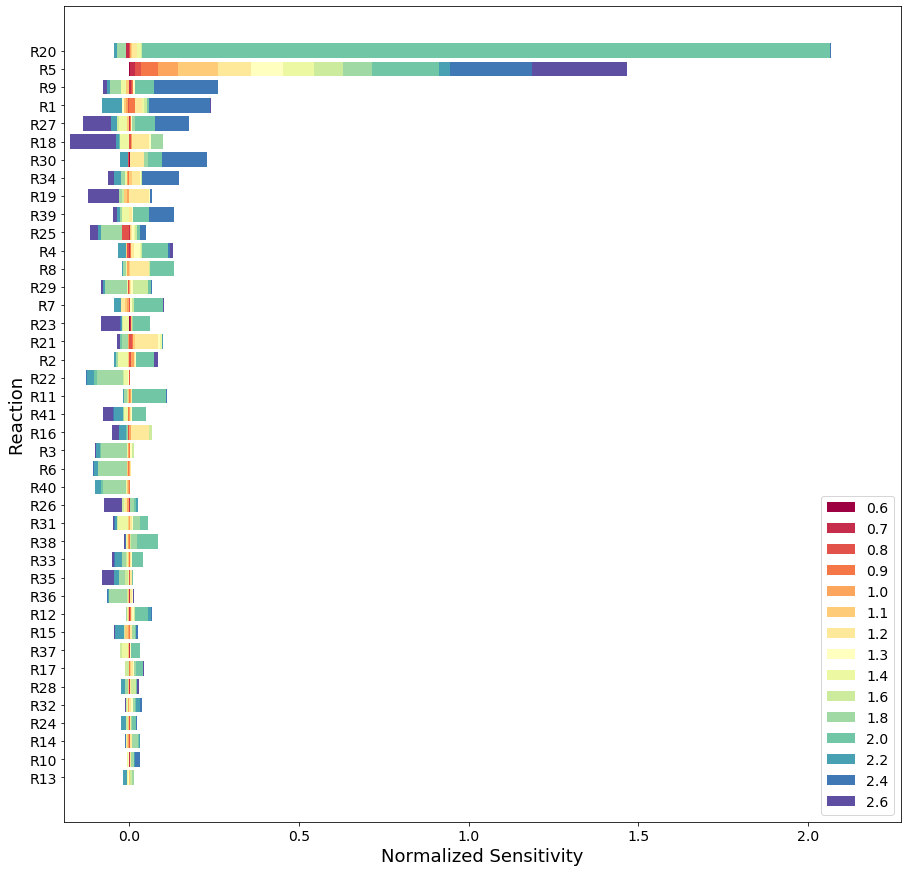

In [37]:
allPlot(normalized_sens_data, 'CH4 Conversion')

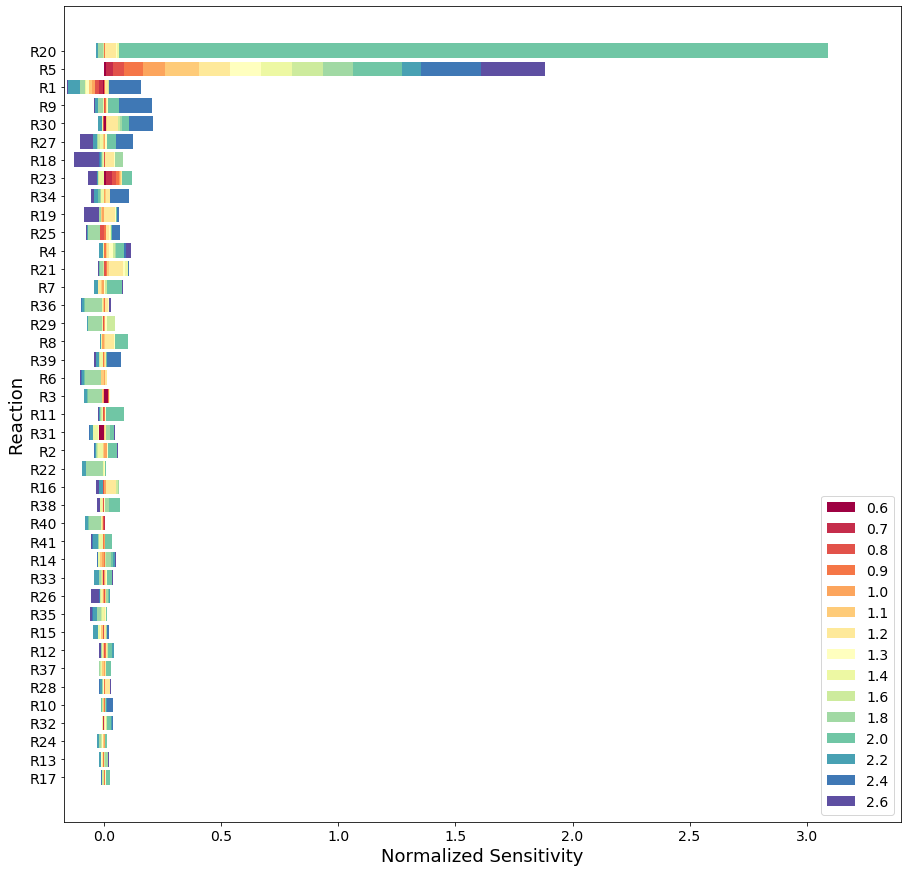

In [38]:
allPlot(normalized_sens_data, 'SynGas Yield')

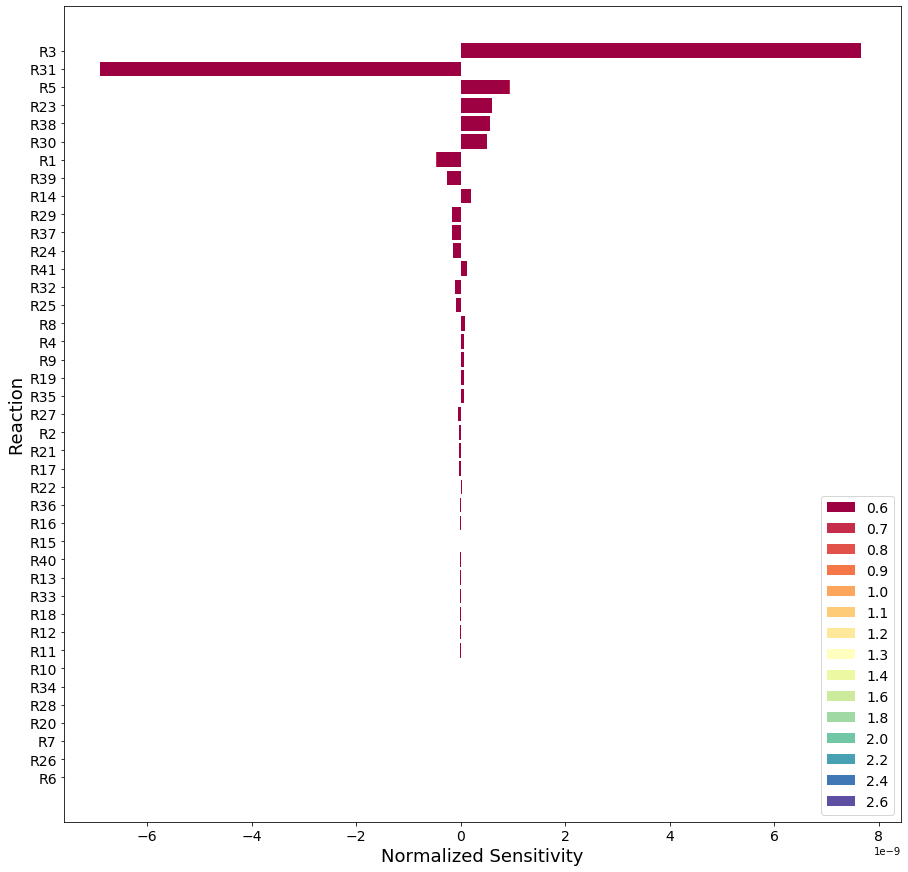

In [39]:
allPlot(normalized_sens_data, 'O2 Conversion')

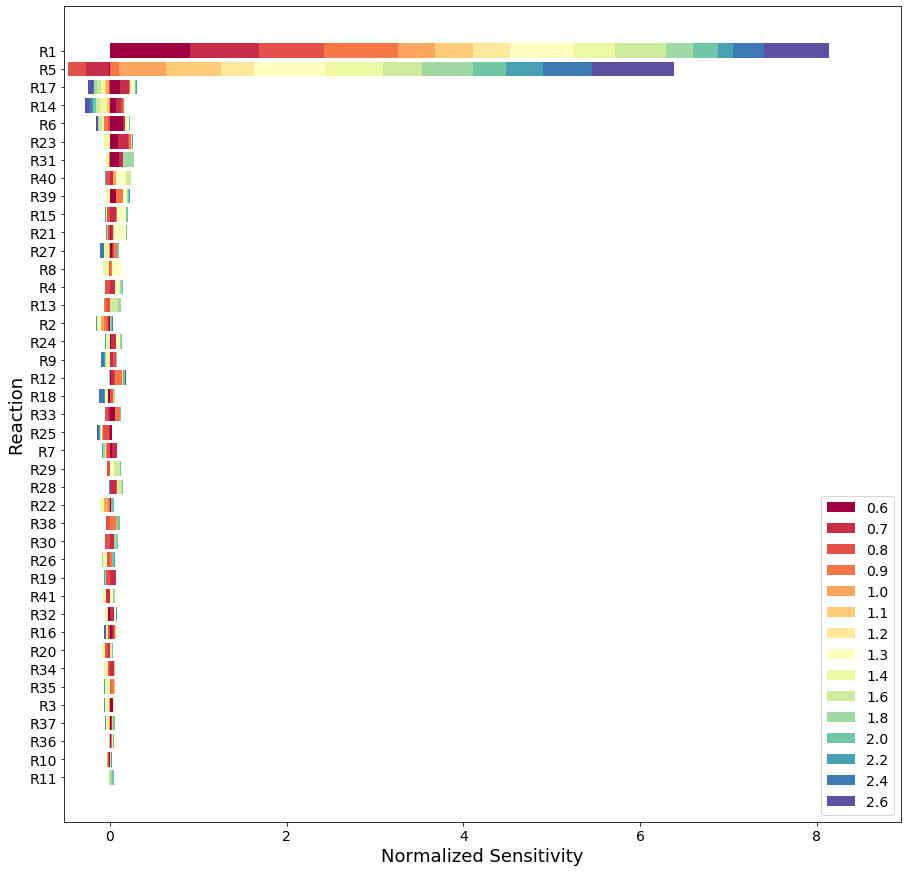

In [40]:
allPlot(normalized_sens_data, 'Max CH4 Conv')

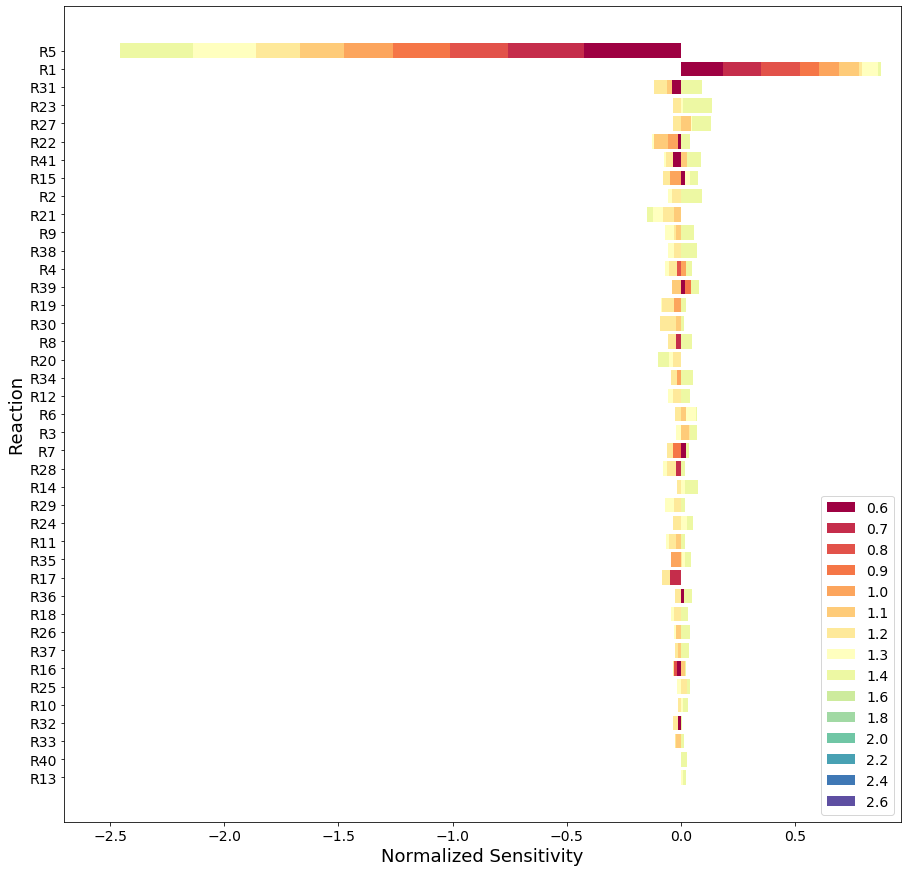

In [41]:
allPlot(normalized_sens_data, 'Dist to 50 CH4 Conv')